# Библиотеки Python для DS (семинары)

Урок 6. Определение проблемы переобучения на практике

Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.


## Выполнение домашней работы

##### Используя diabetes-dataset

In [12]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [13]:
# Скачиваем датасет
dataset_path = Path('uciml/iris')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/uciml/iris/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/uciml/iris


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.84MB/s]

In [5]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

In [6]:
# Загружаем датасет
df = pd.read_csv('iris/Iris.csv')

##### 1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

In [7]:
# Выводим дата фрейм
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Этот фрейм данных содержит следующие столбцы:

1. Id (Индификационный номер)
2. SepalLengthCm (Длина чашелистника см)
3. SepalWidthCm (Ширина чашелистника см)
4. PetalLengthCm (Длинна лепестка см) 
5. PetalWidthCm (Ширина лепестка см)
6. Species (Вид)


In [8]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Из общей информации следует:
1. DataFrame содержит 150 записей (от индекса 0 до 149)
2. Всего 6 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Все колонки в float64 кроме Species которая содержит object и колонки Id в которой хранится int64(Id была удалена)

In [9]:
# Удаляем столбец Id поскольку он для работы нам не нужен
df_irus = df.drop('Id', axis=1)

In [10]:
# Смотрим количество пропущеных значений.
print("Количество пропущенных значений:")
print(df_irus.isnull().sum())

Количество пропущенных значений:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# Смотрим тип данных
df_irus.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
# Статистический анализ числовых переменных
df_irus.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. SepalLengthCm (Длина чашелистника см): 
- Средний общий рейтинг на уровне 5.80
- Миниманая 4.3
- Максимальная 7.9
- Медиана равна 5.84
- Отклонение состовляет 0.82
2. SepalWidthCm (Ширина чашелистника см):
- Средние Счёт/Оценка, счастья на уровне 3.00
- Миниманая 2.00
- Максимальная 4.40
- Медиана равна 3.05
- Отклонение состовляет 0.43
3. PetalLengthCm (Длинна лепестка см):
- Средние значение ВВП на душу населения на уровне 4.35
- Миниманая 1.00
- Максимальная 6.9
- Медиана равна 3.75
- Отклонение состовляет 1.76
4. PetalWidthCm (Ширина лепестка см):
- Средние социальной поддержки на уровне 1.30
- Миниманая 0.10
- Максимальная 2.50
- Медиана равна 1.19
- Отклонение состовляет 0.76

In [13]:
# Статистический анализ объектных переменных
df_irus.describe(include='object').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


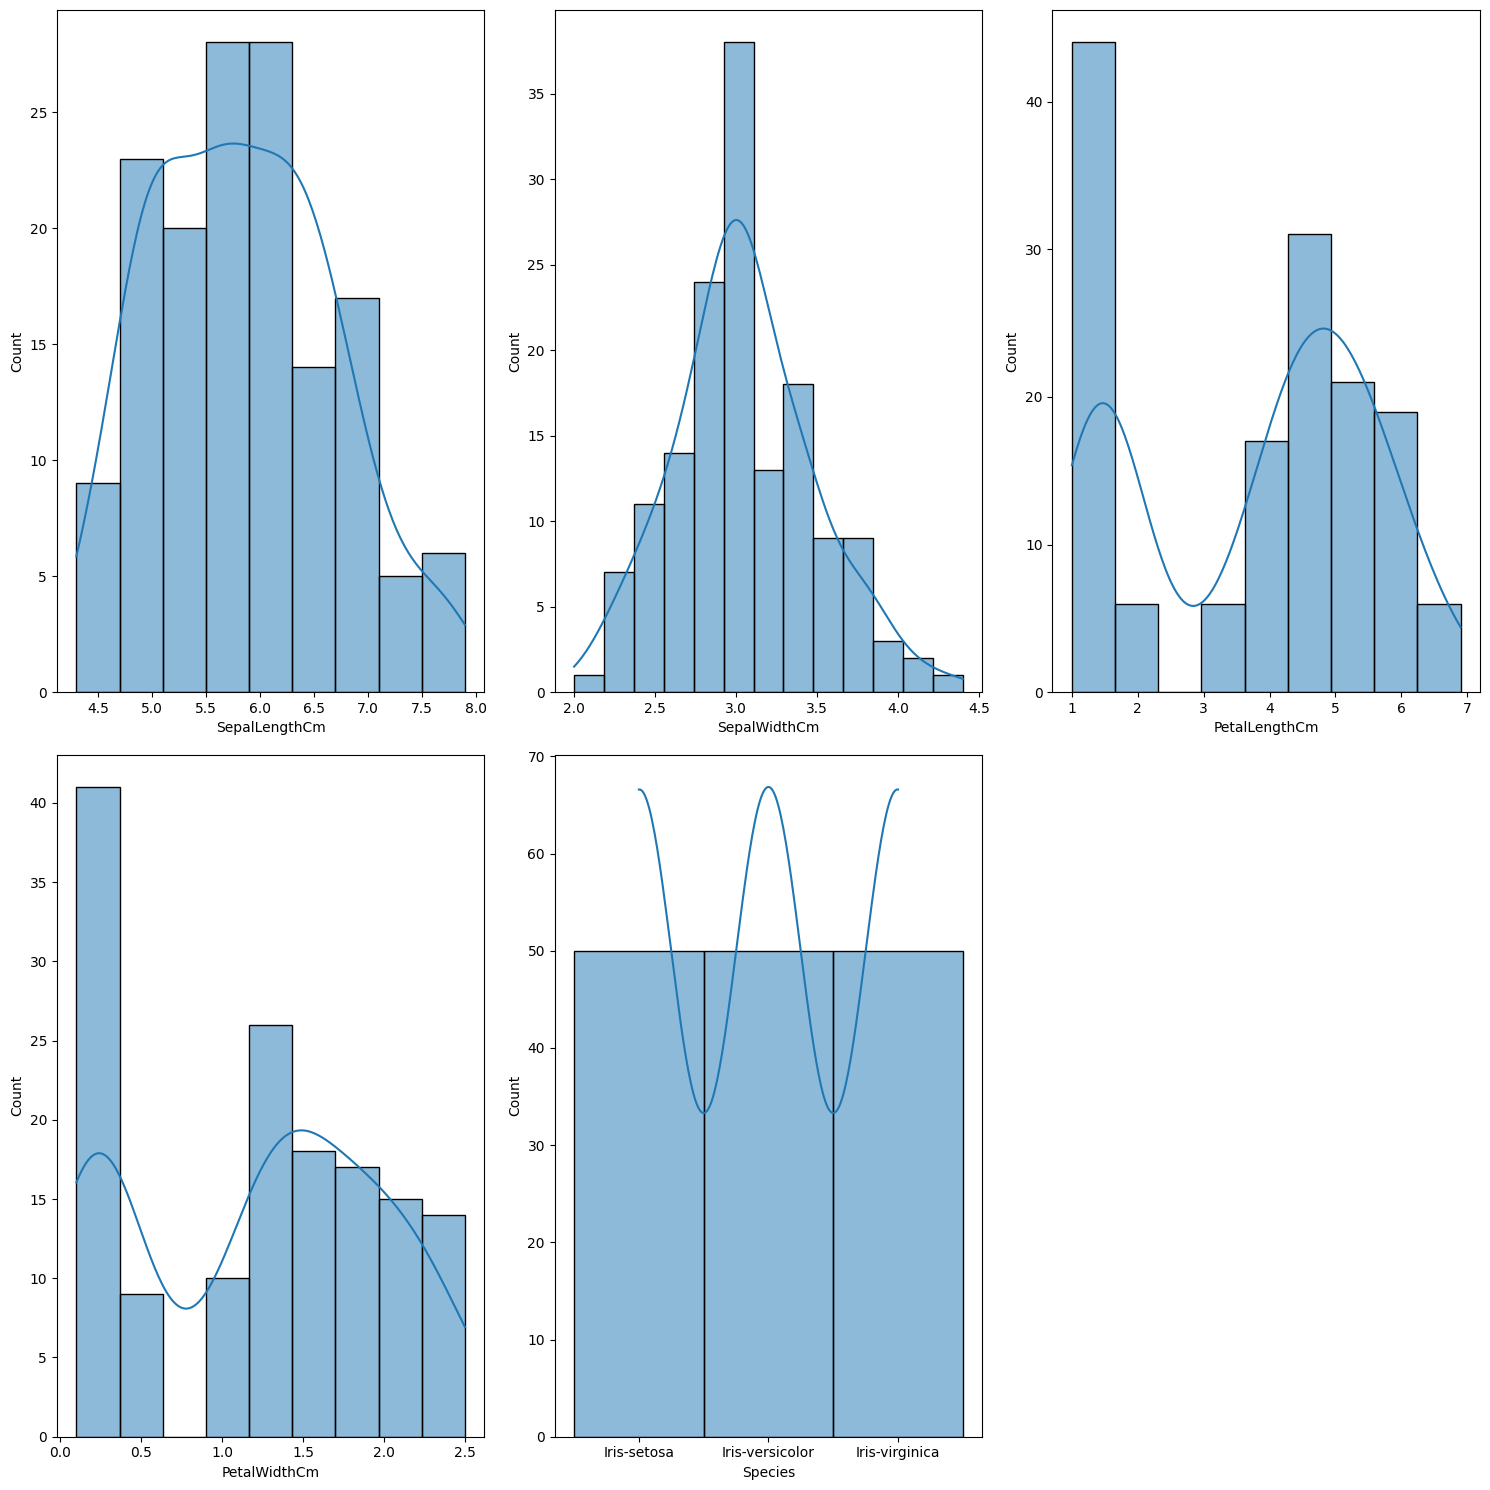

In [17]:
# Визуализация гистограмм
plt.figure(figsize=(15, 15))
for i, column in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_irus[column], kde=True)

plt.tight_layout()
plt.show()

##### 2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

In [134]:
# Подготавливаем столбец diagnosis перед обученим модели
# Приводим обектные значения к интовым
mapDiag = {'B': 0, 'M': 1}
df_cancer['diagnosis'] = df_cancer['diagnosis'].map(mapDiag)

In [135]:
# Проверяем тип чтобы удостовериться, что изменения прошли успешно
df_cancer.dtypes['diagnosis']

dtype('int64')

```
# Извлечём признаки
features = list(df_cancer[2:32])

# Создадим отдельный df с признаками 
df_features = df_cancer[features]

# Определим целевую переменную
target = df_cancer['diagnosis'] 
```
Решил попробовать другой способ разделения признаков в итоге, с данным разделением получаются идеальные метрики Accuracy, Precision, Recall, F1,
по-этому решил вернуться к классическому способу показаному на семинаре.

In [136]:
# Извлечём diagnosis из признаков
X = df_cancer.drop('diagnosis', axis=1)
# Определим целевую переменную
y = df_cancer['diagnosis']

In [137]:
# Определяем переменные для обучения
#X = df_features
#y = target

# Маштабируем признаки
X_scaled = StandardScaler().fit_transform(X)
# Разделяем данные на обучающий и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state = 42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (455, 31)
Размер тестового набора: (114, 31)


##### 3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

##### 4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.